<a href="https://colab.research.google.com/github/zendi014/NodeJS/blob/master/3HL_GANs_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://blog.paperspace.com/implementing-gans-in-tensorflow/


https://github.com/aadilh/blogs/tree/new/basic-gans


## **Building a simple Generative Adversarial Network (GAN) using TensorFlow**

In [0]:
# !pip install tensorflow
#create folder
  # plots/features/
  # plots/iterations/

# upload
  # cases.csv
  # convert_to_gifs.py
  # loss_logs.csv
  # plot.py
  # timer.py
  # training_data.py

!rm -rf 'plots'
!mkdir 'plots'
!mkdir 'plots/features'
!mkdir 'plots/iterations'

In [2]:
import tensorflow as tf
import numpy as np
from numpy import genfromtxt
from numpy.random import uniform, randint
# from training_data import *
import seaborn as sb
import matplotlib.pyplot as plt
from timer import Timer

sb.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# fdir = 'drive/My Drive/SIRIS UMB/SINERGI/GAN PSO/Codes/SimpleGANs/v1/'
# df = genfromtxt(fdir+'ds/ds2_900.csv', delimiter=',')
# EE_SIZE = (len(df) - 1)
# print(EE_SIZE)

In [0]:
# REAL DATA HERE

# def get_y(x):
#     return 10 + x*x

# def sample_data(n=10000, scale=100):
#     data = []
#     x = scale*(np.random.random_sample((n,))-0.5)
#     for i in range(n):
#         yi = get_y(x[i])
#         data.append([x[i], yi])
#     return np.array(data)

# df = genfromtxt('ds2_3600.csv', delimiter=',')
df = genfromtxt('ds4_3600.csv', delimiter=',')
EE_SIZE = (len(df) - 1)

def sample_data(n = 100):
    E = [] #np.zeros((EE_SIZE, EE_LEN))
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')

    for i in range(EE_SIZE):
        x = df[i+1][9]
        y = df[i+1][10]
        z = df[i+1][11]
        E.append([x, y, z])
    
    # ax.scatter(x, y, z)

    # if(i == EE_SIZE-1):
    #     ax.scatter(x, y, z)

    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    # plt.show()

    return np.array(E)


# RANDOM NOISE HERE
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

# Z_batch = sample_Z(256, 3)
# sample_data()/

In [0]:
def generator(Z,hsize=[64, 64, 64],reuse=False):
    with tf.compat.v1.variable_scope("GAN/Generator",reuse=tf.compat.v1.AUTO_REUSE):
        h1 = tf.compat.v1.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.compat.v1.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.compat.v1.layers.dense(h2,hsize[2],activation=tf.nn.leaky_relu)
        out = tf.compat.v1.layers.dense(h3,3)
    return out


In [0]:
def discriminator(X,hsize=[64, 64, 64],reuse=False):
    with tf.compat.v1.variable_scope("GAN/Discriminator",reuse=tf.compat.v1.AUTO_REUSE):
        h1 = tf.compat.v1.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.compat.v1.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.compat.v1.layers.dense(h2,hsize[2],activation=tf.nn.leaky_relu)
        h4 = tf.compat.v1.layers.dense(h3,3)
        out = tf.compat.v1.layers.dense(h4,1)
    return out, h3


In [0]:
tf.compat.v1.disable_eager_execution()

X = tf.compat.v1.placeholder(tf.float32,[None,3])
Z = tf.compat.v1.placeholder(tf.float32,[None,3])

In [8]:
G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
disc_loss = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                          logits=r_logits,labels=tf.ones_like(r_logits)
                    ) + tf.nn.sigmoid_cross_entropy_with_logits(
                          logits=f_logits,labels=tf.zeros_like(f_logits)
                    )
          )
gen_loss = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=f_logits,labels=tf.ones_like(f_logits)
                    )
          )

In [0]:
# tf.compat.v1.reset_default_graph()

gen_vars = tf.compat.v1.get_collection(
                    tf.compat.v1.GraphKeys.GLOBAL_VARIABLES,
                    scope="GAN/Generator"
          )
disc_vars = tf.compat.v1.get_collection(
                    tf.compat.v1.GraphKeys.GLOBAL_VARIABLES,
                    scope="GAN/Discriminator"
        )

# gen_step = tf.compat.v1.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
# disc_step = tf.compat.v1.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step

gen_step = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step


In [11]:
# sess = tf.Session(config=config)
sess = tf.compat.v1.Session()
tf.compat.v1.global_variables_initializer().run(session=sess)

batch_size = EE_SIZE
nd_steps = 100
ng_steps = nd_steps
epoch = 5000
dvd = epoch/10

x_plot = sample_data(n=batch_size)

f = open('loss_logs.csv','w')
f.write('Iteration,Discriminator Loss,Generator Loss\n')

44

In [0]:
X_batch = sample_data(n=batch_size)
Z_batch = sample_Z(batch_size, 3)

In [13]:
t = Timer()
t.start()
print("TRAINING ..")

gLossLogs = np.array([])
dLossLogs = np.array([])

for i in range(epoch):
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 3)

    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    # print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss)
    gLossLogs = np.append(gLossLogs, gloss)
    dLossLogs = np.append(dLossLogs, dloss)
    if (i % dvd == 0): 
        print("Steps: ", nd_steps)
        print("Epoch: [", i, "/", epoch, "]")
        print("D Loss: ", dloss)
        print("G Loss: ", gloss)
        print("---------------------")
        print("")
    
    # if(i%(dvd/10) == 0):
    #     f.write("%d,%f,%f\n"%(i,dloss,gloss))

    if(i % dvd == 0):
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.savefig('./plots/iterations/iteration_%d.png'%i)
        plt.close()

        plt.figure()
        rrd = plt.scatter(rrep_dstep[:,0], rrep_dstep[:,1], alpha=0.5)
        rrg = plt.scatter(rrep_gstep[:,0], rrep_gstep[:,1], alpha=0.5)
        grd = plt.scatter(grep_dstep[:,0], grep_dstep[:,1], alpha=0.5)
        grg = plt.scatter(grep_gstep[:,0], grep_gstep[:,1], alpha=0.5)


        plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))
        plt.title('Transformed Features at Iteration %d'%i)
        plt.tight_layout()
        plt.savefig('./plots/features/feature_transform_%d.png'%i)
        plt.close()

        plt.figure()

        rrdc = plt.scatter(np.mean(rrep_dstep[:,0]), np.mean(rrep_dstep[:,1]),s=100, alpha=0.5)
        rrgc = plt.scatter(np.mean(rrep_gstep[:,0]), np.mean(rrep_gstep[:,1]),s=100, alpha=0.5)
        grdc = plt.scatter(np.mean(grep_dstep[:,0]), np.mean(grep_dstep[:,1]),s=100, alpha=0.5)
        grgc = plt.scatter(np.mean(grep_gstep[:,0]), np.mean(grep_gstep[:,1]),s=100, alpha=0.5)

        plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))

        plt.title('Centroid of Transformed Features at Iteration %d'%i)
        plt.tight_layout()
        plt.savefig('./plots/features/feature_transform_centroid_%d.png'%i)
        plt.close()

f.close()
t.stop()

TRAINING ..
Steps:  100
Epoch: [ 0 / 5000 ]
D Loss:  0.3137184
G Loss:  0.00039434482
---------------------

Steps:  100
Epoch: [ 500 / 5000 ]
D Loss:  0.777661
G Loss:  0.3317947
---------------------

Steps:  100
Epoch: [ 1000 / 5000 ]
D Loss:  0.08689779
G Loss:  0.14163053
---------------------

Steps:  100
Epoch: [ 1500 / 5000 ]
D Loss:  0.1428823
G Loss:  0.15015069
---------------------

Steps:  100
Epoch: [ 2000 / 5000 ]
D Loss:  0.0905938
G Loss:  0.090843655
---------------------

Steps:  100
Epoch: [ 2500 / 5000 ]
D Loss:  0.0991005
G Loss:  0.091645874
---------------------

Steps:  100
Epoch: [ 3000 / 5000 ]
D Loss:  0.90346664
G Loss:  0.32667008
---------------------

Steps:  100
Epoch: [ 3500 / 5000 ]
D Loss:  0.6896057
G Loss:  0.3011134
---------------------

Steps:  100
Epoch: [ 4000 / 5000 ]
D Loss:  0.0650464
G Loss:  0.07362074
---------------------

Steps:  100
Epoch: [ 4500 / 5000 ]
D Loss:  0.15391035
G Loss:  0.16457136
---------------------

Executed time: 22

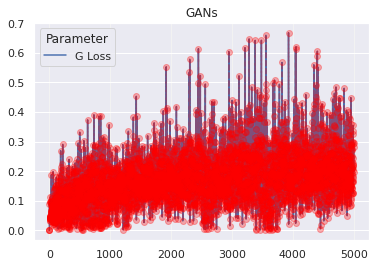

In [14]:
x = np.arange(len(gLossLogs))
y = gLossLogs

plt.step(x, y, label='G Loss')
plt.plot(x, y, 'o--', color='red', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter')
plt.title('GANs')
plt.show()

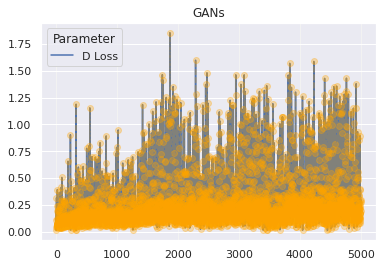

In [15]:
x = np.arange(len(dLossLogs))
y = dLossLogs

plt.step(x, y, label='D Loss')
plt.plot(x, y, 'o--', color='orange', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter')
plt.title('GANs')
plt.show()

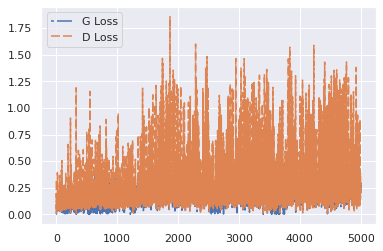

In [16]:
fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, gLossLogs, label='G Loss')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, dLossLogs, dashes=[6, 2], label='D Loss')

ax.legend()
plt.show()

# https://matplotlib.org/gallery/lines_bars_and_markers/line_demo_dash_control.html#sphx-glr-gallery-lines-bars-and-markers-line-demo-dash-control-py

### **OUR PSO**

In [0]:
# # !pip install pyswarms
# import pyswarms as ps
# from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
# import matplotlib.pyplot as plt

# n_particles = len(dLossLogs)

# def f(x):
#     J = np.array([])
#     for i in range(len(dLossLogs)): 
#         J = np.append(J, dLossLogs[i])
#     # print(J)
#     return np.array(J)

# # Initialize swarm
# options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# # Call instance of PSO
# dimensions = epoch
# # print(dimensions)
# optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)

# print("")
# print("GENERATING OPT")
# # Perform optimization
# cost, pos = optimizer.optimize(f, iters=epoch)
# # print(pos)
# # plot_cost_history(optimizer.cost_history)
# # plt.show()

# x = np.arange(len(pos))
# y = pos

# plt.step(x, y, label='D Loss')
# plt.plot(x, y, 'o--', color='orange', alpha=0.3)

# plt.grid(axis='x', color='0.95')
# plt.legend(title='Parameter')
# plt.title('GANs')
# plt.show()